In [2]:
# Imports
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import onnxmltools
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization

In [10]:
# Model
# source: https://medium.com/geekculture/steganography-and-steganalaysis-with-cnn-9bd738dfed6f
model = Sequential()
model.add(Conv2D(128, kernel_size = (3, 3), activation='relu', input_shape=(512,512,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(16, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 510, 510, 128)     3584      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 255, 255, 128)    0         
 2D)                                                             
                                                                 
 batch_normalization_5 (Batc  (None, 255, 255, 128)    512       
 hNormalization)                                                 
                                                                 
 conv2d_6 (Conv2D)           (None, 253, 253, 64)      73792     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 126, 126, 64)     0         
 2D)                                                             
                                                      

In [6]:
# Loading data
data_dir = './data'
imgs = {}
for image_class in os.listdir(data_dir):
    imgs[image_class] = {}
    for image in os.listdir(os.path.join(data_dir, image_class)):
        imgs[image_class][str(image)] = cv2.imread(
            os.path.join(data_dir, image_class, image))
imgs['Cover']['00045.jpg'][0]


array([[122, 111, 107],
       [116, 105, 101],
       [108,  97,  93],
       ...,
       [197, 164, 138],
       [197, 164, 138],
       [197, 164, 138]], dtype=uint8)

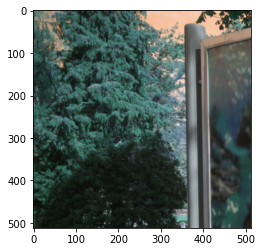

In [7]:
plt.imshow(imgs['Cover']['00001.jpg'])

In [8]:
model.save('./model')

INFO:tensorflow:Assets written to: ./model/assets


INFO:tensorflow:Assets written to: ./model/assets


In [9]:
onnx_model = onnxmltools.convert_keras(model)
onnxmltools.utils.save_model(onnx_model, './model/example.onnx')

2022-10-17 23:19:42.589864: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0
2022-10-17 23:19:42.590195: I tensorflow/core/grappler/clusters/single_machine.cc:358] Starting new session


Instructions for updating:
Use `tf.compat.v1.graph_util.extract_sub_graph`


Instructions for updating:
Use `tf.compat.v1.graph_util.extract_sub_graph`
2022-10-17 23:19:42.999135: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0
2022-10-17 23:19:42.999548: I tensorflow/core/grappler/clusters/single_machine.cc:358] Starting new session


In [ ]:
# Training
